In [166]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.min_rows', 20)

In [167]:
#df = pd.read_csv("../data/raw/properties_data.csv")
df = pd.read_pickle("../data/clean/clean_data.pkl")



In [168]:
df['postalCode'] = df['postalCode'].astype('float64')
df['postalCode'] = (df['postalCode'] / 100).apply(np.floor)
df['postalCode'] = df['postalCode'].astype('Int64').astype('str')


In [169]:
#df['constructionYear'] = df['constructionYear'].fillna('no_info')


In [170]:
df_h = df[df['type'] == 'HOUSE']
df_a = df[df['type'] == 'APARTMENT']

df_h = df_h.drop('type', axis=1)
df_a = df_a.drop('type', axis=1)


In [171]:
df.columns

Index(['price', 'type', 'subtype', 'region', 'province', 'district',
       'postalCode', 'latitude', 'longitude', 'bedroomCount',
       'netHabitableSurface', 'constructionYear', 'condition', 'hasLift',
       'kitchen', 'hasGarden', 'gardenSurface', 'hasTerrace', 'terraceSurface',
       'fireplaceExists', 'hasSwimmingPool', 'hasAirConditioning',
       'bathroomCount', 'showerRoomCount', 'parkingCountIndoor', 'heatingType',
       'hasDoubleGlazing', 'saleType'],
      dtype='object')

In [172]:
# features to drop 'saleType', 'latitude', 'longitude', 'constructionYear', 'fireplaceExists, 'hasAirConditioning, 'saleType'

# should probably keep 'condition'
# not sure 'kitchen', 'hasGarden'

# to keep ['price', 'region', 'province', 'district', 'netHabitableSurface', 'bedroomCount', 'hasDoubleGlazing',  'condition', 'hasGarden', 'gardenSurface']

# negative HOUSE test score on with random_state = 70 on this particular set of features
features_70 = ['price', 'region', 'province', 'district', 'netHabitableSurface', 'bedroomCount', 'hasDoubleGlazing', 'condition', 'hasSwimmingPool', 'bathroomCount', 'showerRoomCount', 'parkingCountIndoor', 'heatingType', 'hasGarden', 'gardenSurface', 'hasTerrace']
# heatingType had some values with very low count which would cause the negative test score. if scares values are not split evenly (all in test or train)
# grouping them in 'OTHER' fixed the score 

# random_state 22 gives a negative test score on APARTMENT
features_22 = ['price', 'region', 'province', 'district', 'netHabitableSurface', 'bedroomCount', 'hasDoubleGlazing', 'condition', 'hasSwimmingPool', 'bathroomCount', 'showerRoomCount', 'parkingCountIndoor', 'hasGarden', 'gardenSurface', 'hasTerrace', 'hasLift']

xgb_features = ['price', 'region', 'province', 'district', 'netHabitableSurface', 'bedroomCount', 'hasDoubleGlazing', 'condition', 'hasSwimmingPool', 'bathroomCount', 'showerRoomCount', 'parkingCountIndoor', 'hasGarden', 'gardenSurface', 'hasTerrace', 'hasLift', 'kitchen', 'latitude', 'longitude', 'constructionYear']


linear_reg_features = ['price', 'region', 'province', 'netHabitableSurface', 'bedroomCount', 'hasDoubleGlazing', 'condition', 'hasSwimmingPool', 'bathroomCount', 'showerRoomCount', 'parkingCountIndoor', 'hasGarden', 'gardenSurface', 'hasTerrace', 'hasLift', 'kitchen', 'latitude', 'longitude']

test_features = ['price', 'region', 'province', 'netHabitableSurface', 'bedroomCount', 'hasDoubleGlazing', 'condition', 'hasSwimmingPool', 'bathroomCount', 'showerRoomCount', 'parkingCountIndoor', 'hasGarden', 'gardenSurface', 'hasTerrace', 'hasLift', 'kitchen', 'latitude', 'longitude']


# RANDOM STATE: 522
# Negative test score
# removing 'district' fixed it
features_522 = ['price', 'region', 'province', 'district', 'netHabitableSurface', 'bedroomCount', 'hasDoubleGlazing', 'condition', 'hasSwimmingPool', 'bathroomCount', 'showerRoomCount', 'parkingCountIndoor', 'hasGarden', 'gardenSurface', 'hasTerrace', 'hasLift', 'kitchen', 'latitude', 'longitude']



df_a = df_a[test_features]
df_h = df_h[test_features]

df = df[test_features]



In [173]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()


In [174]:
categorical_df = df.select_dtypes(include=['object'])
categorical_col = categorical_df.columns
# fit and transform the categorical data into a sparse matrix
encoded_data = ohe.fit_transform(categorical_df)
encoded_data

<11454x26 sparse matrix of type '<class 'numpy.float64'>'
	with 45816 stored elements in Compressed Sparse Row format>

In [175]:
# convert into a dense array
encoded_array = encoded_data.toarray()
encoded_array


array([[0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.]])

In [176]:
encoded_df = pd.DataFrame(encoded_array, columns=ohe.get_feature_names_out(categorical_col))
encoded_df

,region_Brussels,region_Flanders,region_Wallonie,province_Antwerp,province_Brussels,province_East Flanders,province_Flemish Brabant,province_Hainaut,province_Limburg,province_Liège,province_Luxembourg,province_Namur,province_Walloon Brabant,province_West Flanders,condition_AS_NEW,condition_GOOD,condition_JUST_RENOVATED,condition_TO_BE_DONE_UP,condition_TO_RENOVATE,condition_TO_RESTORE,condition_no_info,kitchen_INSTALLED,kitchen_NOT_INSTALLED,kitchen_SEMI_EQUIPPED,kitchen_SUPER_EQUIPPED,kitchen_no_info
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [177]:
from sklearn.preprocessing import OneHotEncoder

def encode_categorical_columns(df):
    
    encoder = OneHotEncoder()
    categorical_col = df.select_dtypes(include=['object']).columns
    
    # fit and transform the categorical data into a sparse matrix
    encoded_data = encoder.fit_transform(df[categorical_col])

    # convert into a dense array
    encoded_array = encoded_data.toarray()

    encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(categorical_col))
    
    df = df.drop(columns=categorical_col)
    df_encoded = pd.concat([df.reset_index(drop=True), encoded_df], axis=1)
        
    return df_encoded


In [178]:
# df_a = pd.get_dummies(df_a)
# df_h = pd.get_dummies(df_h)
# df = pd.get_dummies(df)

df_a = encode_categorical_columns(df_a)
df_h = encode_categorical_columns(df_h)
df = encode_categorical_columns(df)


,price,netHabitableSurface,bedroomCount,hasDoubleGlazing,hasSwimmingPool,bathroomCount,showerRoomCount,parkingCountIndoor,hasGarden,gardenSurface,hasTerrace,hasLift,latitude,longitude,region_Brussels,region_Flanders,region_Wallonie,province_Antwerp,province_Brussels,province_East Flanders,province_Flemish Brabant,province_Hainaut,province_Limburg,province_Liège,province_Luxembourg,province_Namur,province_Walloon Brabant,province_West Flanders,condition_AS_NEW,condition_GOOD,condition_JUST_RENOVATED,condition_TO_BE_DONE_UP,condition_TO_RENOVATE,condition_TO_RESTORE,condition_no_info,kitchen_INSTALLED,kitchen_NOT_INSTALLED,kitchen_SEMI_EQUIPPED,kitchen_SUPER_EQUIPPED,kitchen_no_info
0,205186.0,98.0,2.0,0,0,0.0,0.0,0.0,0,0.0,1,0,50.736136,3.215874,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,330000.0,100.0,2.0,0,0,1.0,0.0,0.0,0,0.0,1,1,50.801612,4.334257,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,235000.0,90.0,2.0,0,0,1.0,0.0,1.0,0,0.0,0,0,51.047552,5.225709,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,335000.0,112.0,2.0,0,0,1.0,0.0,1.0,0,0.0,1,0,50.726077,5.689852,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,209000.0,63.0,2.0,1,0,1.0,0.0,0.0,0,0.0,1,0,51.289634,4.443195,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,169900.0,50.0,1.0,1,0,1.0,0.0,1.0,0,0.0,1,1,51.161402,4.142049,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,199000.0,105.0,2.0,0,0,2.0,0.0,0.0,0,0.0,0,0,51.181410,4.349223,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
7,349000.0,130.0,2.0,1,0,1.0,0.0,0.0,0,0.0,1,0,51.165316,4.139890,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,295000.0,76.0,2.0,1,0,1.0,0.0,1.0,0,0.0,0,0,50.979643,4.969709,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9,349000.0,148.0,2.0,1,0,1.0,0.0,0.0,0,0.0,0,1,51.209763,4.407608,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


,price,netHabitableSurface,bedroomCount,hasDoubleGlazing,hasSwimmingPool,bathroomCount,showerRoomCount,parkingCountIndoor,hasGarden,gardenSurface,hasTerrace,hasLift,latitude,longitude,region_Brussels,region_Flanders,region_Wallonie,province_Antwerp,province_Brussels,province_East Flanders,province_Flemish Brabant,province_Hainaut,province_Limburg,province_Liège,province_Luxembourg,province_Namur,province_Walloon Brabant,province_West Flanders,condition_AS_NEW,condition_GOOD,condition_JUST_RENOVATED,condition_TO_BE_DONE_UP,condition_TO_RENOVATE,condition_TO_RESTORE,condition_no_info,kitchen_INSTALLED,kitchen_NOT_INSTALLED,kitchen_SEMI_EQUIPPED,kitchen_SUPER_EQUIPPED,kitchen_no_info
0,180000.0,148.0,3.0,0,0,1.0,0.0,0.0,0,0.0,0,0,51.302538,4.883080,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,225000.0,180.0,4.0,1,0,1.0,0.0,0.0,0,0.0,1,0,51.084302,4.385862,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,398000.0,141.0,4.0,1,0,1.0,1.0,0.0,0,0.0,1,0,51.202705,3.177086,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,412000.0,209.0,4.0,1,0,2.0,0.0,0.0,1,1.0,0,0,51.223963,4.454222,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,365000.0,130.0,2.0,0,0,1.0,0.0,1.0,1,505.0,0,0,51.056692,4.669403,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,695000.0,240.0,5.0,1,0,2.0,0.0,3.0,0,0.0,1,0,50.697316,5.335598,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6,148700.0,167.0,3.0,0,0,0.0,0.0,0.0,0,0.0,0,0,50.854971,2.743808,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7,395000.0,139.0,3.0,1,0,1.0,0.0,1.0,0,0.0,0,0,50.872392,3.598118,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,395000.0,147.0,3.0,1,0,1.0,0.0,2.0,1,0.0,1,0,50.734578,3.579045,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9,299000.0,315.0,4.0,1,0,1.0,0.0,0.0,1,25.0,1,0,50.277078,5.910733,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


,price,netHabitableSurface,bedroomCount,hasDoubleGlazing,hasSwimmingPool,bathroomCount,showerRoomCount,parkingCountIndoor,hasGarden,gardenSurface,hasTerrace,hasLift,latitude,longitude,region_Brussels,region_Flanders,region_Wallonie,province_Antwerp,province_Brussels,province_East Flanders,province_Flemish Brabant,province_Hainaut,province_Limburg,province_Liège,province_Luxembourg,province_Namur,province_Walloon Brabant,province_West Flanders,condition_AS_NEW,condition_GOOD,condition_JUST_RENOVATED,condition_TO_BE_DONE_UP,condition_TO_RENOVATE,condition_TO_RESTORE,condition_no_info,kitchen_INSTALLED,kitchen_NOT_INSTALLED,kitchen_SEMI_EQUIPPED,kitchen_SUPER_EQUIPPED,kitchen_no_info
0,180000.0,148.0,3.0,0,0,1.0,0.0,0.0,0,0.0,0,0,51.302538,4.883080,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,225000.0,180.0,4.0,1,0,1.0,0.0,0.0,0,0.0,1,0,51.084302,4.385862,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,398000.0,141.0,4.0,1,0,1.0,1.0,0.0,0,0.0,1,0,51.202705,3.177086,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,412000.0,209.0,4.0,1,0,2.0,0.0,0.0,1,1.0,0,0,51.223963,4.454222,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,365000.0,130.0,2.0,0,0,1.0,0.0,1.0,1,505.0,0,0,51.056692,4.669403,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,695000.0,240.0,5.0,1,0,2.0,0.0,3.0,0,0.0,1,0,50.697316,5.335598,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6,148700.0,167.0,3.0,0,0,0.0,0.0,0.0,0,0.0,0,0,50.854971,2.743808,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7,395000.0,139.0,3.0,1,0,1.0,0.0,1.0,0,0.0,0,0,50.872392,3.598118,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,395000.0,147.0,3.0,1,0,1.0,0.0,2.0,1,0.0,1,0,50.734578,3.579045,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9,299000.0,315.0,4.0,1,0,1.0,0.0,0.0,1,25.0,1,0,50.277078,5.910733,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [179]:
df_a

,price,netHabitableSurface,bedroomCount,hasDoubleGlazing,hasSwimmingPool,bathroomCount,showerRoomCount,parkingCountIndoor,hasGarden,gardenSurface,hasTerrace,hasLift,latitude,longitude,region_Brussels,region_Flanders,region_Wallonie,province_Antwerp,province_Brussels,province_East Flanders,province_Flemish Brabant,province_Hainaut,province_Limburg,province_Liège,province_Luxembourg,province_Namur,province_Walloon Brabant,province_West Flanders,condition_AS_NEW,condition_GOOD,condition_JUST_RENOVATED,condition_TO_BE_DONE_UP,condition_TO_RENOVATE,condition_TO_RESTORE,condition_no_info,kitchen_INSTALLED,kitchen_NOT_INSTALLED,kitchen_SEMI_EQUIPPED,kitchen_SUPER_EQUIPPED,kitchen_no_info
0,205186.0,98.0,2.0,0,0,0.0,0.0,0.0,0,0.0,1,0,50.736136,3.215874,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,330000.0,100.0,2.0,0,0,1.0,0.0,0.0,0,0.0,1,1,50.801612,4.334257,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,235000.0,90.0,2.0,0,0,1.0,0.0,1.0,0,0.0,0,0,51.047552,5.225709,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,335000.0,112.0,2.0,0,0,1.0,0.0,1.0,0,0.0,1,0,50.726077,5.689852,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,209000.0,63.0,2.0,1,0,1.0,0.0,0.0,0,0.0,1,0,51.289634,4.443195,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,169900.0,50.0,1.0,1,0,1.0,0.0,1.0,0,0.0,1,1,51.161402,4.142049,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,199000.0,105.0,2.0,0,0,2.0,0.0,0.0,0,0.0,0,0,51.181410,4.349223,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
7,349000.0,130.0,2.0,1,0,1.0,0.0,0.0,0,0.0,1,0,51.165316,4.139890,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,295000.0,76.0,2.0,1,0,1.0,0.0,1.0,0,0.0,0,0,50.979643,4.969709,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9,349000.0,148.0,2.0,1,0,1.0,0.0,0.0,0,0.0,0,1,51.209763,4.407608,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [180]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

from random import *


def split_data(df, random_state):
    X, y = df.drop('price', axis=1), df['price']
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=random_state)
    return X_train, X_test, y_train, y_test


# scale features
def scale_features(X_train, X_test):
    
    scaler = MinMaxScaler()
    scaled_X_train = scaler.fit_transform(X_train)
    scaled_X_test = scaler.transform(X_test)

    df_scaled_X_train = pd.DataFrame(scaled_X_train, columns=X_train.columns)
    df_scaled_X_test = pd.DataFrame(scaled_X_test, columns=X_test.columns)
    
    return df_scaled_X_train, df_scaled_X_test

def regression_train_eval(X_train, X_test, y_train, y_test, prop_type):
    
    scaled_X_train, scaled_X_test = scale_features(X_train, X_test)

    model = LinearRegression()
    model.fit(scaled_X_train, y_train)

    y_pred = model.predict(X_test)

    # weights associated with each features
    # print("Coefficients: \n", model.coef_)

    print(f'    {prop_type}:')
    print("        Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
    print("        Training score: %.2f" % model.score(scaled_X_train, y_train))
    print("        Test score: %.2f" % model.score(scaled_X_test, y_test))
    
    sns.regplot(x=y_test, y=y_pred, scatter_kws={"alpha": 0.45}, line_kws={"color": "blue"})

    plt.title(f'{prop_type}')
    plt.xlabel("Actual Price")
    plt.ylabel("Predicted Price")
    plt.show()
    
    print("y_test.min: ", y_test.min())
    print("y_test.max: ", y_test.max())
    print("y_test.min: ", y_test.min())
    print("y_test.max: ", y_test.max())
    
    
def linear_reg(df, prop_type, random_state):
    X_train, X_test, y_train, y_test = split_data(df, random_state)
    regression_train_eval(X_train, X_test, y_train, y_test, prop_type)

RANDOM STATE: 727
    ALL:
        Mean squared error: 56208309699189392.00
        Training score: 0.60
        Test score: 0.59


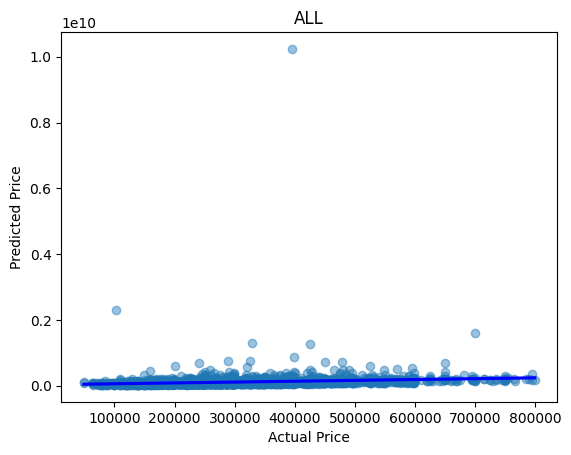

y_test.min:  49000.0
y_test.max:  799000.0
y_test.min:  49000.0
y_test.max:  799000.0
    HOUSE:
        Mean squared error: 105852755462885920.00
        Training score: 0.60
        Test score: 0.56


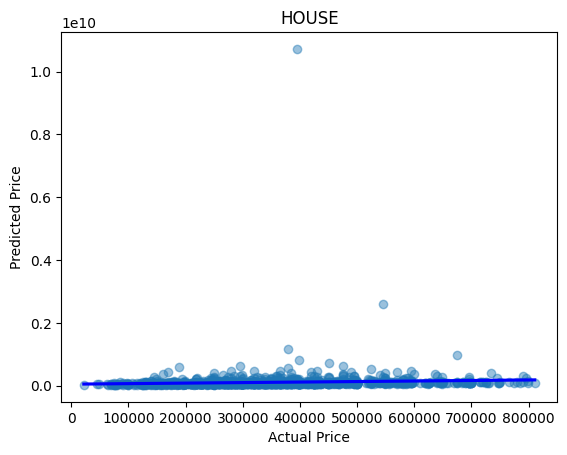

y_test.min:  22000.0
y_test.max:  810722.0
y_test.min:  22000.0
y_test.max:  810722.0
    APARTMENT:
        Mean squared error: 6849819784507082.00
        Training score: 0.56
        Test score: 0.54


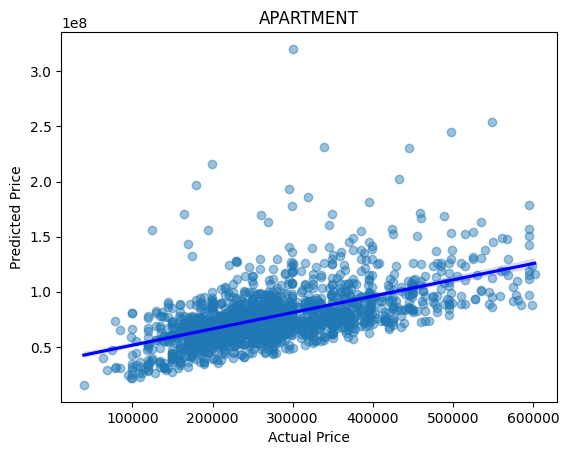

y_test.min:  39500.0
y_test.max:  601900.0
y_test.min:  39500.0
y_test.max:  601900.0
RANDOM STATE: 289
    ALL:
        Mean squared error: 49596416317954400.00
        Training score: 0.60
        Test score: 0.60


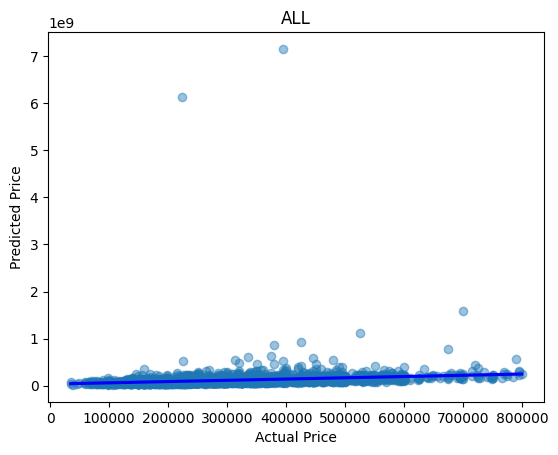

y_test.min:  35000.0
y_test.max:  799000.0
y_test.min:  35000.0
y_test.max:  799000.0
    HOUSE:
        Mean squared error: 17234030092201780.00
        Training score: 0.60
        Test score: 0.60


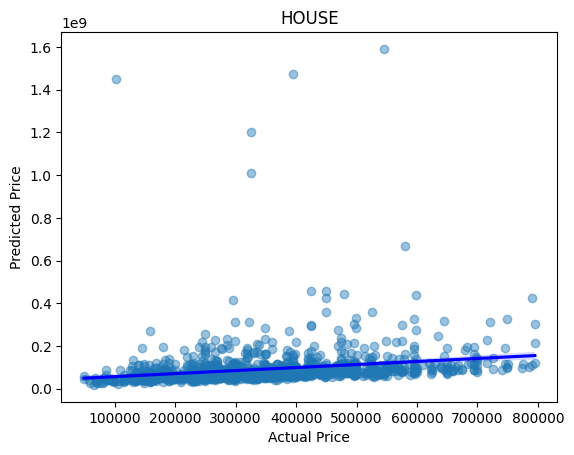

y_test.min:  49000.0
y_test.max:  795000.0
y_test.min:  49000.0
y_test.max:  795000.0
    APARTMENT:
        Mean squared error: 7034883356883018.00
        Training score: 0.56
        Test score: 0.56


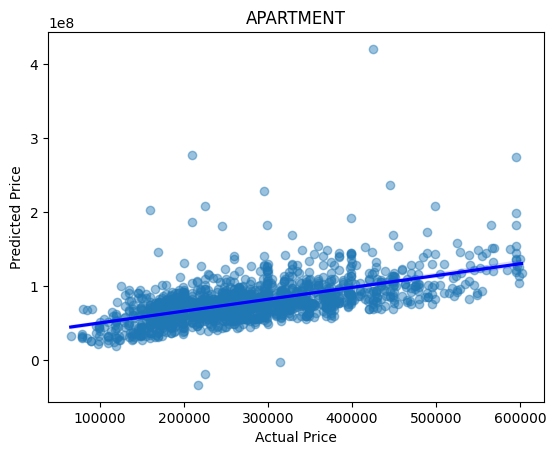

y_test.min:  65000.0
y_test.max:  601900.0
y_test.min:  65000.0
y_test.max:  601900.0


In [181]:
def main_linear(df, df_h, df_a, random_state='rand'):
    if random_state == 'rand':
        random_state = randint(1, 1000)
    print(f'RANDOM STATE: {random_state}')
    linear_reg(df, 'ALL', random_state)
    linear_reg(df_h, 'HOUSE', random_state)
    linear_reg(df_a, 'APARTMENT', random_state)
    

main_linear(df, df_h, df_a, 'rand')
main_linear(df, df_h, df_a, 'rand')

In [182]:
import xgboost as xgb

def xgb_train_eval(X_train, X_test, y_train, y_test, prop_type):
    

    # scale features
    scaled_X_train, scaled_X_test = scale_features(X_train, X_test)
    
    model = xgb.XGBRegressor()
    model.fit(scaled_X_train, y_train)
    y_pred = model.predict(scaled_X_test)


    print(f'    {prop_type}:')
    print("        Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
    print("        Training score: %.2f" % model.score(scaled_X_train, y_train))
    print("        Test score: %.2f" % model.score(scaled_X_test, y_test))

    plt.scatter(y_test, y_pred, color="black")
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="blue")
    plt.title(f'{prop_type}')
    plt.xlabel("Actual Price")
    plt.ylabel("Predicted Price")
    plt.show()
    print("y_test.min: ", y_test.min())
    print("y_test.max: ", y_test.max())
    print("y_test.min: ", y_test.min())
    print("y_test.max: ", y_test.max())
def xgb_reg(df, prop_type, random_state):
    X_train, X_test, y_train, y_test = split_data(df, random_state)
    xgb_train_eval(X_train, X_test, y_train, y_test, prop_type)

RANDOM STATE: 539
    ALL:
        Mean squared error: 5384371992.98
        Training score: 0.90
        Test score: 0.69


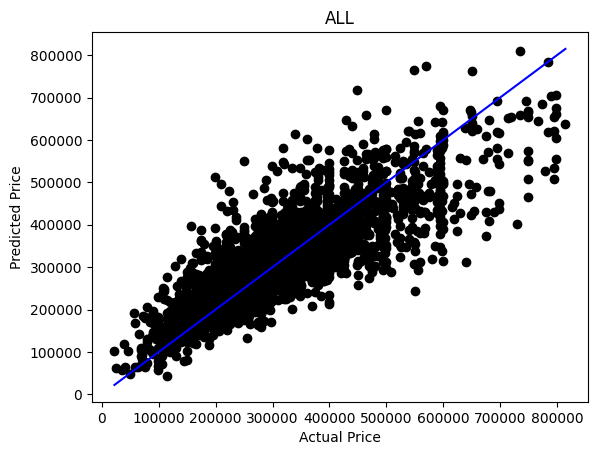

y_test.min:  22000.0
y_test.max:  815000.0
y_test.min:  22000.0
y_test.max:  815000.0
    HOUSE:
        Mean squared error: 7337856538.30
        Training score: 0.93
        Test score: 0.66


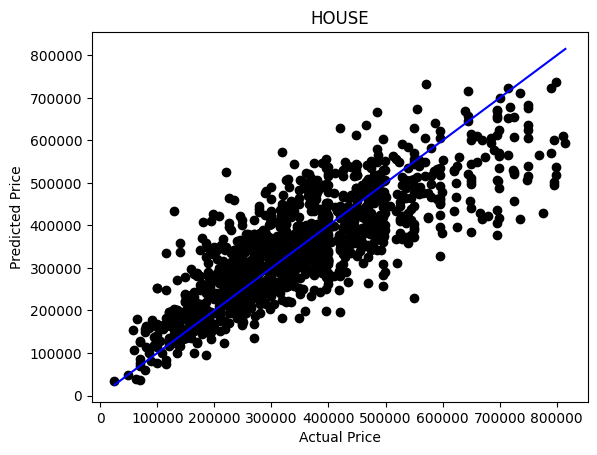

y_test.min:  25000.0
y_test.max:  815000.0
y_test.min:  25000.0
y_test.max:  815000.0
    APARTMENT:
        Mean squared error: 2972735534.96
        Training score: 0.95
        Test score: 0.72


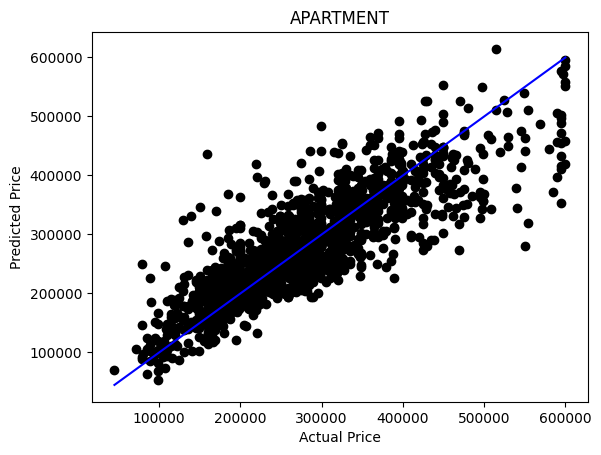

y_test.min:  45000.0
y_test.max:  600000.0
y_test.min:  45000.0
y_test.max:  600000.0
RANDOM STATE: 716
    ALL:
        Mean squared error: 5127499185.45
        Training score: 0.90
        Test score: 0.68


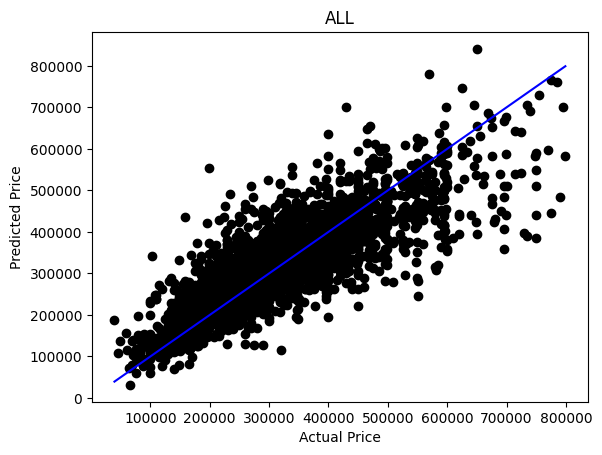

y_test.min:  39500.0
y_test.max:  799000.0
y_test.min:  39500.0
y_test.max:  799000.0
    HOUSE:
        Mean squared error: 7663432540.79
        Training score: 0.93
        Test score: 0.63


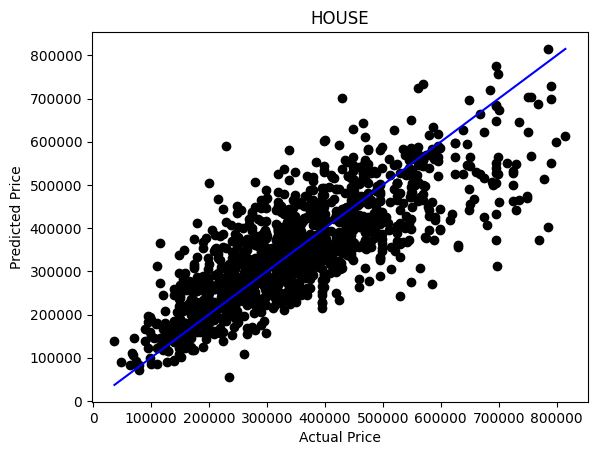

y_test.min:  37000.0
y_test.max:  815000.0
y_test.min:  37000.0
y_test.max:  815000.0
    APARTMENT:
        Mean squared error: 2922659844.65
        Training score: 0.94
        Test score: 0.73


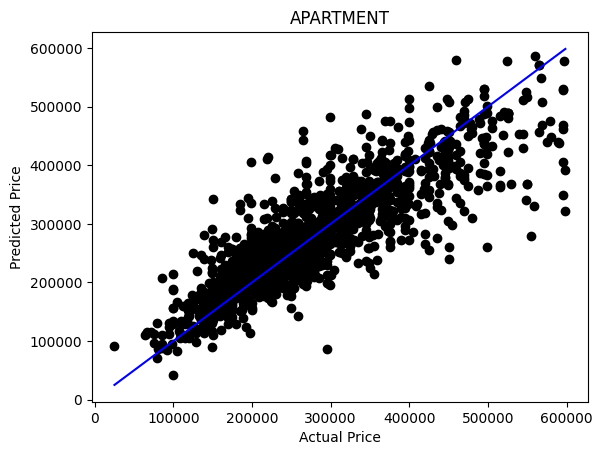

y_test.min:  25000.0
y_test.max:  598500.0
y_test.min:  25000.0
y_test.max:  598500.0


In [183]:
def main_xgb(df, df_h, df_a, random_state):
    if random_state == 'rand':
        random_state = randint(1, 1000)
    print(f'RANDOM STATE: {random_state}')
    xgb_reg(df, 'ALL', random_state)
    xgb_reg(df_h, 'HOUSE', random_state)
    xgb_reg(df_a, 'APARTMENT', random_state)
    
main_xgb(df, df_h, df_a, 'rand')
main_xgb(df, df_h, df_a, 'rand')



RANDOM STATE: 586


    ALL:
        Mean squared error: 5201592681.58
        Training score: 0.90
        Test score: 0.68


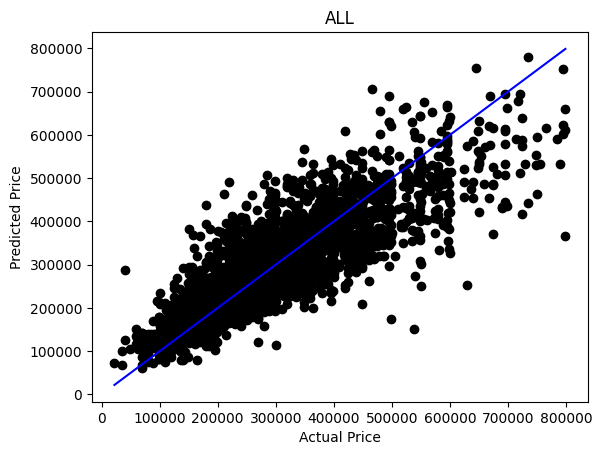

y_test.min:  22000.0
y_test.max:  799000.0
y_test.min:  22000.0
y_test.max:  799000.0
    HOUSE:
        Mean squared error: 7310153634.54
        Training score: 0.94
        Test score: 0.62


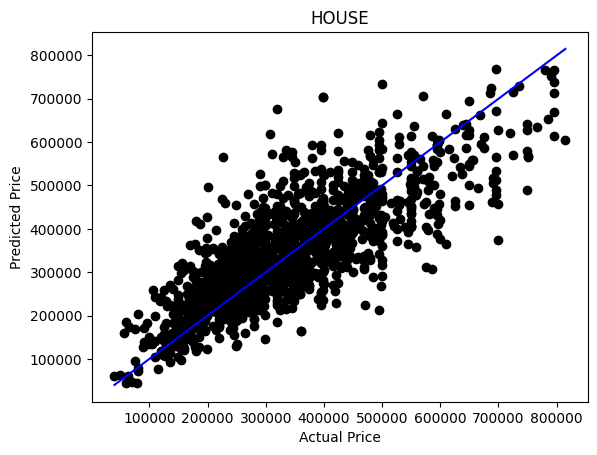

y_test.min:  39900.0
y_test.max:  815000.0
y_test.min:  39900.0
y_test.max:  815000.0
    APARTMENT:
        Mean squared error: 2941089052.45
        Training score: 0.93
        Test score: 0.72


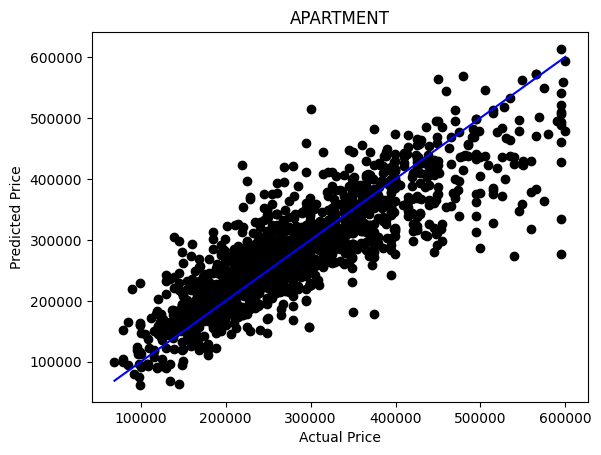

y_test.min:  69000.0
y_test.max:  600000.0
y_test.min:  69000.0
y_test.max:  600000.0
RANDOM STATE: 145
    ALL:
        Mean squared error: 5105127599.01
        Training score: 0.90
        Test score: 0.69


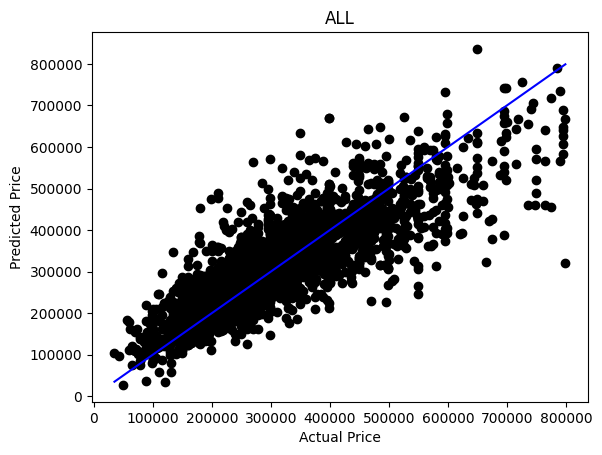

y_test.min:  35000.0
y_test.max:  799000.0
y_test.min:  35000.0
y_test.max:  799000.0
    HOUSE:
        Mean squared error: 7694261077.19
        Training score: 0.93
        Test score: 0.63


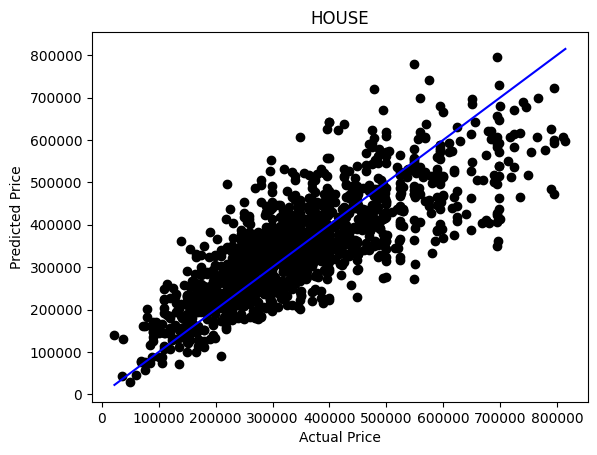

y_test.min:  22000.0
y_test.max:  815000.0
y_test.min:  22000.0
y_test.max:  815000.0
    APARTMENT:
        Mean squared error: 3243357407.92
        Training score: 0.94
        Test score: 0.70


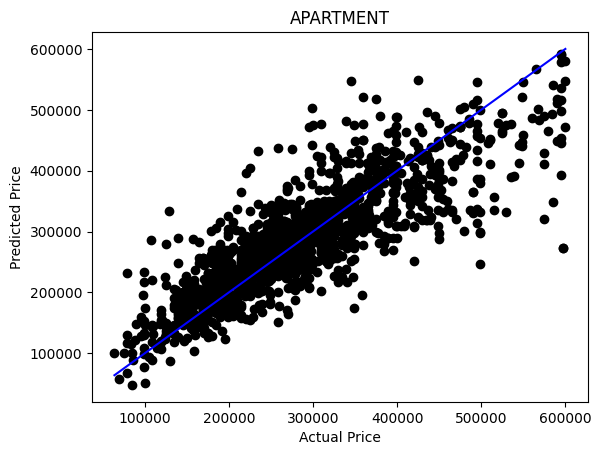

y_test.min:  64000.0
y_test.max:  600000.0
y_test.min:  64000.0
y_test.max:  600000.0


In [184]:
main_xgb(df, df_h, df_a, 'rand')
main_xgb(df, df_h, df_a, 'rand')